# Mapping statistical significance of call volume differences.
This file creates a map of the statistical significance of differences between call volumes to identify fire station districts that may be more at risk for heat related emergencies and to identify areas of conern.

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns

In [3]:
station_gdf = gpd.read_file('../data/Mesonet/daily_temp.gpkg')
station_gdf.head()

,date_time,stid,relative_humidity_high,air_temp_high,heat_index_high,relative_humidity_low,air_temp_low,heat_index_low,lon,lat,geometry
0,2018-01-01,KBUR,100.00,73.94,72.12299,22.35,44.6,42.07209,-118.36538,34.19967,POINT (-118.36538 34.19967)
1,2018-01-02,KBUR,82.14,80.96,79.29248,12.73,51.8,49.59400,-118.36538,34.19967,POINT (-118.36538 34.19967)
2,2018-01-03,KBUR,52.30,75.20,74.11247,16.05,53.6,50.30359,-118.36538,34.19967,POINT (-118.36538 34.19967)
3,2018-01-04,KBUR,50.37,75.20,74.23091,18.57,51.8,49.03376,-118.36538,34.19967,POINT (-118.36538 34.19967)
4,2018-01-05,KBUR,93.65,73.40,73.11665,40.92,53.6,52.77579,-118.36538,34.19967,POINT (-118.36538 34.19967)


In [4]:
station_loc = station_gdf.groupby('stid').first().reset_index()[['stid', 'geometry', 'lat', 'lon']]

In [5]:
stations = { # Selected by 
    'Downtown LA/USC' : 'KCQT',
    'LAX': 'KLAX',
    'Hawthorne': 'KHHR',
    'Van Nuys': 'KVNY',
    'Burbank': 'KBUR',
    'Whiteman': 'KWHP',
    'Santa Monica': 'KSMO',
    'Torrance': 'KTOA',
    'Long Beach': 'KLGB',
    'El Monte': 'KEMT'
    #'Camarillo': 'KCMA', Potential station on the north west of the city (near malibu)
    }

In [6]:
station_dict = {v:k for k, v in stations.items()}

In [7]:
station_loc['name'] = station_loc['stid'].map(station_dict)

In [8]:
station_loc.to_file('../data/Mesonet/stations.gpkg', driver='GPKG', index=False)

In [9]:
stats = pd.read_csv('../data/Analysis/district_t_test.csv')

In [10]:
stats['Significant'] = stats['t_test']<=0.05
stats

,District,no_heat_mean,heat_mean,t_test,Significant
0,1,7.240471,8.372093,0.013194,True
1,2,10.548767,12.232558,0.009155,True
2,3,11.748322,12.025641,0.315189,False
3,4,16.054220,17.210526,0.098621,False
4,5,5.536680,5.357143,0.610268,False
...,...,...,...,...,...
97,106,6.064723,6.401786,0.095643,False
98,107,4.107338,4.241573,0.215131,False
99,108,0.462104,0.559322,0.184508,False
100,109,1.295791,1.536232,0.052468,False


In [11]:
stats['Significant'].sum()

37

In [12]:
districts_gdf = gpd.read_file('../data/LCVA/LCVA_pop.gpkg')
districts_gdf = districts_gdf[['District', 'geometry']]
districts_gdf['District'] = districts_gdf['District'].astype(int)

stats_gdf = districts_gdf.merge(stats, on='District')
stats_gdf

,District,geometry,no_heat_mean,heat_mean,t_test,Significant
0,58,"MULTIPOLYGON (((-118.36743 34.06034, -118.3672...",12.180609,11.136364,0.890532,False
1,23,"MULTIPOLYGON (((-118.53778 34.11104, -118.5766...",1.481253,1.950000,0.033918,True
2,47,"MULTIPOLYGON (((-118.16056 34.08369, -118.1605...",4.195726,4.918367,0.032585,True
3,55,"MULTIPOLYGON (((-118.23008 34.13561, -118.2304...",3.447383,3.180000,0.827803,False
4,62,"MULTIPOLYGON (((-118.43229 34.02398, -118.4338...",7.014901,8.533333,0.059903,False
...,...,...,...,...,...,...
97,43,"MULTIPOLYGON (((-118.40045 34.04014, -118.4004...",6.512438,6.111111,0.732560,False
98,40,"MULTIPOLYGON (((-118.24484 33.76312, -118.2452...",0.297507,0.272727,0.582094,False
99,92,"MULTIPOLYGON (((-118.42316 34.06581, -118.4233...",5.498065,5.833333,0.323098,False
100,20,"MULTIPOLYGON (((-118.25042 34.09495, -118.2505...",7.661625,8.238095,0.119153,False


In [13]:
mapping = {True: 'Significant', False: 'Not Significant'}
stats_gdf['for_plot'] = stats_gdf['Significant'].map(mapping)

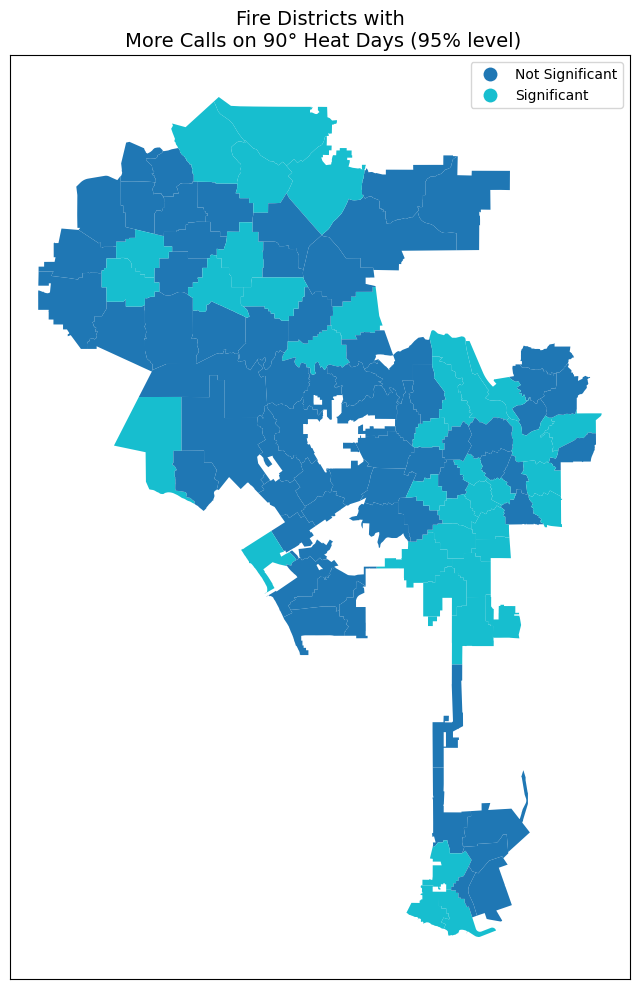

In [14]:
fig, ax = plt.subplots(figsize=(8,12))
stats_gdf.plot(column='for_plot', legend=True, ax=ax)
plt.xticks([])
plt.yticks([])

plt.title('Fire Districts with\n More Calls on 90° Heat Days (95% level)', fontsize='14')

plt.show()

In [15]:
stats_gdf.to_file('../data/Analysis/t_test.shp')

/var/folders/kz/8hthyz657tlbhl0x92mmdj2r0000gn/T/ipykernel_2313/1840503613.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stats_gdf.to_file('data/Analysis/t_test.shp')
